# Dealing with Data Spring 2020 – Class 10

---

# GROUP BY

```sql
SELECT A1, Aggregation Function [count(*), sum(*), avg(*), min, etc.]
FROM T1, T2, ... Tm
WHERE condition
GROUP BY A1
```

`count(*)` counts the number of rows in the group <br> 
`count(attr)` counts the number of rows in the group with non-null values for the attribute <br> 
`count(DISTINCT attr)` counts the number of distinct, non-null values for the attributes in the group <br> 
`max(attr)` row with maximum attribute value in the group <br>
`min(attr)` row with minimum value in the group <br>
`sum(attr)` sum values of selected rows in the group <br>
`avg(attr)` estimates the average attribute in the group

---

# Exercise 1: 

> Find the most popular Category for NYC filming permits.

In [ ]:
# your code here

# Solution

```SQL 
SELECT Category, COUNT(DISTINCT EventID) as film_permits
FROM nyc_film_permits
GROUP BY Category
ORDER BY film_permits DESC;
```

---

# Exercise 2: 

>  Find the most popular Borough by Category for NYC filming permits.

In [ ]:
# your code here

# Solution

```SQL
SELECT Category, Borough, COUNT(DISTINCT EventID) as film_permits
FROM nyc_film_permits
GROUP BY Category, Borough
ORDER BY Category ASC, film_permits DESC;
```

---

# Exercise 3: 

> Find the year and zipcode with the most tax returns in NYC

# Solution

```SQL
SELECT zipcode, year, SUM(return_count) as total_returns
FROM irs_nyc_tax_returns
GROUP BY zipcode, year
ORDER BY total_returns DESC;
```

---

# HAVING

```sql 
SELECT A1, Aggregation Function
FROM T1, T2, ... Tm
WHERE condition
GROUP BY A1
HAVING Aggregation Function Condition
```
<br>

`WHERE` applies to rows _before_ computing the aggregate <br>
`HAVING` applies to the aggregate value only

`AKA, the WHERE clause applies the condition to individual rows before they are summarized into groups by the GROUP BY clause. HAVING, meanwhile, applies the condition to the group after the rows are grouped into groups.`

---

# Exercise 6: 

> Find the subcategories with more than 5,000 NYC filming permits in the database.

In [ ]:
# your code here

# Solution

```SQL 
SELECT Category, SubCategoryName, COUNT(DISTINCT EventID) as permit_count
FROM nyc_film_permits
GROUP BY Category, SubCategoryName
HAVING permit_count > 5000
ORDER BY permit_count DESC;
```

---

# Exercise 7: 

> Find the year where "Commercials" had fewer than 700 filming permits.



In [ ]:
# your code here

# Solution

```SQL 
SELECT STRFTIME('%Y',StartDateTime) as permit_year, COUNT(DISTINCT EventID) as permit_count
FROM nyc_film_permits
WHERE LOWER(Category) = "commercial" 
GROUP BY permit_year
HAVING permit_count < 700
ORDER BY permit_count DESC;
```

---

# Conditional Construction: CASE

```SQL
CASE
    WHEN condition THEN result
    WHEN condition2 THEN result2
    ELSE result
END
```

---

# Exercise 8:

> Map each zipcode and year's return counts to a "return count" bucket

In [ ]:
# your code here

# Solution

```SQL 
SELECT year, zipcode, 
    CASE
        WHEN SUM(return_count) < 5000 THEN "under 5k returns" 
        WHEN SUM(return_count) < 1000 THEN "5k to 10k returns" 
        WHEN SUM(return_count) < 25000 THEN "10k to 25k returns" 
        WHEN SUM(return_count) < 50000 THEN "25k to 50k returns" 
        WHEN SUM(return_count) < 100000 THEN "50k to 100k returns" 
        ELSE "over 100k returns" 
    END AS return_count_bucket
FROM irs_nyc_tax_returns
GROUP BY year, zipcode;
```

---

# Exercise 9: 

> Make the results more human friendly by giving a short name for the agi_map_id field results.

In [ ]:
# your code here

# Solution

```SQL 
SELECT year, zipcode, 
    CASE agi_map_id
        WHEN 1 THEN "under 25k" 
        WHEN 2 THEN "25k to 50k"
        WHEN 3 THEN "50k to 75k" 
        WHEN 4 THEN "75k to 100k" 
        WHEN 5 THEN "100k to 200k" 
        ELSE "over 200k" 
    END AS income_level, return_count
FROM irs_nyc_tax_returns
WHERE zipcode = 10128 AND year = 2013;
```

---

# Exercise 10: 

> Flatten the IRS database by putting the return_count in a seprate column for each agi_map_id.

In [ ]:
# your code here

# Solution

```SQL
SELECT year, zipcode, 
    SUM(CASE WHEN agi_map_id = 1 THEN return_count ELSE NULL END) AS agi_under25k,
    SUM(CASE WHEN agi_map_id = 2 THEN return_count ELSE NULL END) AS agi_25k_to_50k,
    SUM(CASE WHEN agi_map_id = 3 THEN return_count ELSE NULL END) AS agi_50k_to_75k,
    SUM(CASE WHEN agi_map_id = 4 THEN return_count ELSE NULL END) AS agi_75k_to_100k,
    SUM(CASE WHEN agi_map_id = 5 THEN return_count ELSE NULL END) AS agi_100k_to_200k,
    SUM(CASE WHEN agi_map_id = 6 THEN return_count ELSE NULL END) AS agi_over200k
FROM irs_nyc_tax_returns
GROUP BY year, zipcode;
```

---

# SQL JOINS

First and foremost, any join requires a common data field found in both tables that enables the combination. However, those data fields don't need to share a common name, but they must be the same data type!

NB: LEFT and RIGHT are determined by order after the FROM command! 

<img src="https://i.stack.imgur.com/VQ5XP.png">

# INNER JOIN

> This is the default SQL JOIN, thus you don't even need to specify "INNER". <br> <br>

1) A new table is created with the columns of both tables you're trying to combine, <br><br>
2) It then looks to match values between the columns you specify in your 'ON' statement, <br><br>
3) SQL will start with the first value of the specified column in the first table, then look through every value in the specified column of the second table for a match, <br><br>
4) If there is a match, SQL will copy the data from both the row of the first table and the row of the second table and put it in the newly created table; It won't add any rows that didn't have a match

<br>

`AKA an INNER JOIN is going to return all rows when the comparisoin fields (in the "ON" statement") are matching in BOTH tables.`

In [ ]:
from IPython.display import HTML
HTML('<img src="https://dataschool.com/assets/images/how-to-teach-people-sql/innerJoin/innerJoin_3.gif">')

---

# Exercise 11: 

> Combine the IRS tax returns with the human-readable form of the income buckets.

In [ ]:
# your code here

# Solution

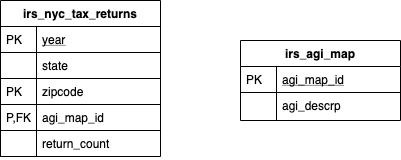

```SQL 
SELECT map.agi_descrp, SUM(return_count) AS total_returns
FROM irs_nyc_tax_returns irs
    INNER JOIN irs_agi_map map
        ON irs.agi_map_id = map.agi_map_id
GROUP BY map.agi_descrp
ORDER BY irs.year ASC;
```

---

# Exercise 12: 

> Find if there's a potential relationship between total filming permits and annual average tax returns for the top 10 zip codes for filming permits. 

In [ ]:
# your code here

# Solution

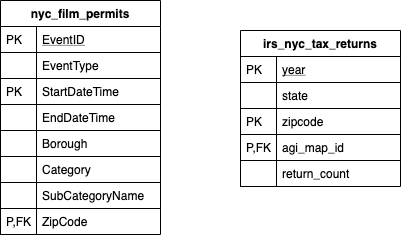

```SQL 
SELECT irs.zipcode, ROUND(AVG(irs.return_count),0) as tax_returns, COUNT(DISTINCT nfp.EventID) as permit_count
FROM nyc_film_permits nfp
    INNER JOIN irs_nyc_tax_returns irs
        ON (irs.zipcode = nfp.zipcode AND strftime('%Y',nfp.EndDateTime) = irs.year)
GROUP BY irs.zipcode
ORDER BY permit_count DESC
LIMIT 10;
```

---

# LEFT JOIN

> LEFT refers to the first table, or the table you'll be joining to. <br> <br>
> For any rows in the LEFT table that don't have a match in the RIGHT table, it still adds that row to the next table but puts nulls for the missing columns

<br> 

`AKA a LEFT JOIN is going to return all rows from the LEFT table with matching rows from the RIGHT table`

In [ ]:
from IPython.display import HTML
HTML('<img src="https://dataschool.com/assets/images/how-to-teach-people-sql/leftJoin/leftJoin_1.gif">')

---

# Exercise 13: 

> Find the bottom 20 zipcodes for filming permits.

In [ ]:
# your code here

# Solution

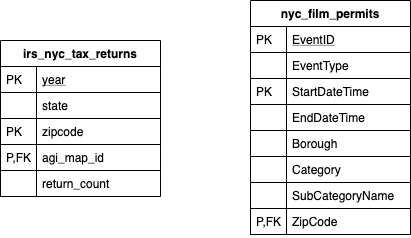

```SQL
SELECT irs.zipcode, COUNT(DISTINCT nfp.EventID) as permit_count
FROM irs_nyc_tax_returns irs
    LEFT OUTER JOIN nyc_film_permits nfp
        ON (irs.zipcode = nfp.zipcode AND strftime('%Y',nfp.EndDateTime) = irs.year) 
GROUP BY irs.zipcode
ORDER BY permit_count ASC
LIMIT 20;
```

---

# Exercise 14: 

> Find the percentage of children living in the top 5 filming permit zipcodes over all years in the database.

In [ ]:
# your code here

# Solution

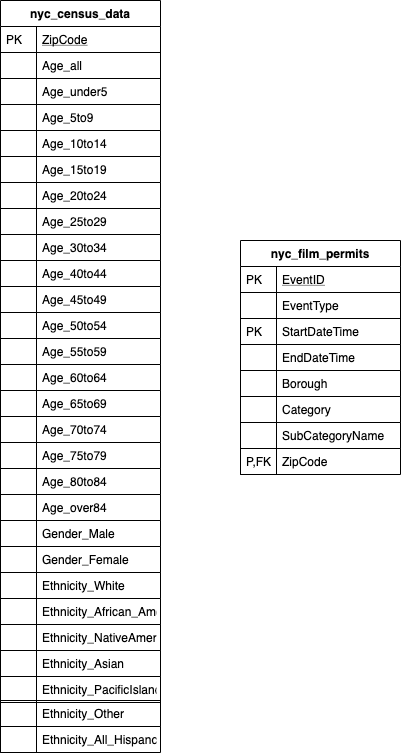

```SQL
SELECT cen.zipcode, 100*(SUM(Age_under5) + SUM(Age_5to9) + SUM(Age_10to14) + SUM(Age_15to19)) / SUM(cen.age_all) as percent_children, 
COUNT(DISTINCT nfp.EventID) as permit_count
FROM nyc_census_data cen
    LEFT JOIN nyc_film_permits nfp
          ON cen.zipcode = nfp.zipcode
GROUP BY cen.zipcode                                                                                 
ORDER BY permit_count DESC
LIMIT 5;                                                                                
```

---

# RIGHT JOIN

> RIGHT refers to the second table, or the table you'll be joining in. <br> <br>
> A RIGHT JOIN can be re-written as a LEFT JOIN, and is thus much more rare in practice.

---

# FULL OUTER JOIN

> FULL OUTER refers to the first table, or the table you'll be joining to (in this case, the Facebook table since it comes before LinkedIn in the query). <br> <br>
> After completing a LEFT join of the data, it basically perorms a RIGHT join – only checking ot see if each value is present in the joined table. If it is not, SQL will add this row to the new table and put nulls for the columns from the other table.

`AKA, a FULL OUTER JOIN returns all rows in both tables that match the query's WHERE clause, and when the ON condition can't be satisfied, a NULL is put in for those unpopulated fields`

In [ ]:
from IPython.display import HTML
HTML('<img src="https://dataschool.com/assets/images/how-to-teach-people-sql/fullOuter/fullOuter_1.gif">')

---

# UNION

`UNION` is used to combine the result-set of two or more SELECT statements

In [ ]:
from IPython.display import HTML
HTML('<img src="https://dataschool.com/assets/images/how-to-teach-people-sql/union/union_2.gif">')

---

# CROSS JOIN

`CROSS JOIN` joins every row from Table 1 with every row from Table 1. 

`AKA, a CROSS JOIN returns all possible combinations of all rows.`

In [ ]:
from IPython.display import HTML
HTML('<img src="https://dataschool.com/assets/images/how-to-teach-people-sql/crossJoin/crossJoin_1.gif">')

---

# Subqueries / Nested Queries

Subqueries are temporary tables created with nested SELECT statements where a table should be that allow for deeper analysis with SQL.

---

> Find the top 10 zipcodes with the largest percentage of persons of Latino/Hispanic descent, and calculate the percentage of adults and percentage of six-figure income earners in those zipcodes. 

```SQL 
SELECT cen.zipcode, 
100*(SUM(Age_under5) + SUM(Age_5to9) + SUM(Age_10to14) + SUM(Age_15to19)) / SUM(cen.age_all) AS adult_pct, 
100*SUM(cen.Ethnicity_All_HispancLatino_Descent) / SUM(cen.Age_all) AS latino_pct,
100*SUM(irs.agi_over200k) + SUM(irs.agi_100k_to_200k)) / SUM(total_returns) AS six_figure_income_pct                 FROM nyc_census_data cen
     INNER JOIN( 
         SELECT 
             year, 
             zipcode, 
             SUM(CASE WHEN agi_map_id = 1 THEN return_count ELSE NULL END) AS agi_under25k,
             SUM(CASE WHEN agi_map_id = 2 THEN return_count ELSE NULL END) AS agi_25k_to_50k,
             SUM(CASE WHEN agi_map_id = 3 THEN return_count ELSE NULL END) AS agi_50k_to_75k,
             SUM(CASE WHEN agi_map_id = 4 THEN return_count ELSE NULL END) AS agi_75k_to_100k,
             SUM(CASE WHEN agi_map_id = 5 THEN return_count ELSE NULL END) AS agi_100k_to_200k,
             SUM(CASE WHEN agi_map_id = 6 THEN return_count ELSE NULL END) AS agi_over200k,
             SUM(return_count) AS total_returns
        FROM irs_nyc_tax_returns
        GROUP BY year, zipcode
        ) irs ON cen.zipcode = irs.zipcode
WHERE irs.year = 2012
GROUP BY cen.zipcode
ORDER BY latino_pct DESC
LIMIT 10;                                                    
```

---

# Exercise 15: 

> What year had the most return counts from the Borough of Brooklyn?

In [ ]:
# your code here

# Solution

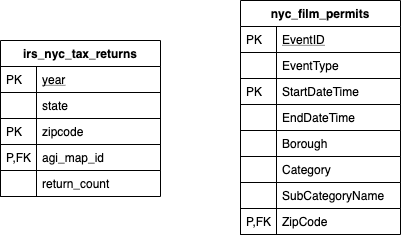

`INNER JOIN` OR `LEFT JOIN` <br>
_(Pros/Cons)? .........  (Pros/Cons)?_

```SQL
SELECT irs.year, SUM(irs.return_count) as return_count
FROM irs_nyc_tax_returns irs
    LEFT OUTER JOIN (
        SELECT ZipCode, Borough
        FROM nyc_film_permits nfp
        WHERE Borough = "Brooklyn"
    ) nfp ON irs.zipcode = nfp.ZipCode
GROUP BY irs.year         
```

---

# Exercise 16: 

> In zipcodes where the majority of film permits have the sub category "Commerical", what is the predominant age group?  

In [ ]:
# your code here

# Solution

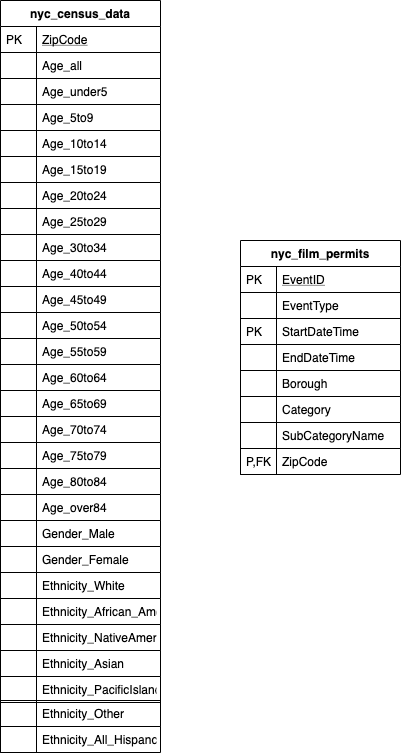

`INNER JOIN` OR `LEFT JOIN` <br>
_(Pros/Cons)? .........  (Pros/Cons)?_

```SQL
SELECT 
    cen.ZipCode,
    SUM(Age_under5) + SUM(Age_5to9) + SUM(Age_10to14) + SUM(Age_15to19) as under19,
    SUM(Age_20to24) + SUM(Age_25to29) + SUM(Age_30to34) as bw_20and34,
    SUM(Age_40to44) + SUM(Age_45to49) + SUM(Age_50to54) + SUM(Age_55to59) as bw_40and59,
    SUM(Age_60to64) + SUM(Age_65to69) + SUM(Age_70to74) + SUM(Age_75to79) as bw_60and79,
    SUM(Age_80to84) + SUM(Age_over84) as over80,
    nfp.zipcode
FROM nyc_census_data cen 
    JOIN (
        SELECT 
            nfp.zipcode
        FROM nyc_film_permits nfp
        WHERE nfp.SubCategoryName = "Commercial"
   ) nfp ON cen.ZipCode = nfp.zipcode
GROUP BY cen.ZipCode;
```

---